# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
#  1. Get the total rides for each city type
rides_by_city_type = pyber_data_df.groupby('type').count()['ride_id']

In [5]:
# 2. Get the total drivers for each city type
driver_by_city_type = city_data_df.groupby('type').sum()['driver_count']

In [6]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby('type').sum()['fare']

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_by_city_type = pyber_data_df.groupby('type').sum()['fare'] / rides_by_city_type

In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_by_city_type = pyber_data_df.groupby('type').sum()['fare'] / driver_by_city_type

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides':rides_by_city_type,
                                 'Total Drivers':driver_by_city_type,
                                 'Total Fares':fares_by_city_type,
                                 'Average Fare per Ride':avg_fare_per_ride_by_city_type,
                                 'Average Fare per Driver':avg_fare_per_driver_by_city_type
                                })

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,.0f}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,.0f}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_type_and_date_df = pyber_data_df.groupby(['type','date']).sum()[['fare']]


In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_type_and_date_df= fares_by_type_and_date_df.reset_index()
# Convert the date to datetime format to execute the search in step # 5 below
fares_by_type_and_date_df['date'] = pd.to_datetime(fares_by_type_and_date_df['date'])

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_by_dates = fares_by_type_and_date_df.pivot(index = 'date', columns = 'type',values = 'fare')


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range_from_pivot_df = pivot_by_dates.loc['2019-01-01':'2019-04-29']




In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

# step completed prior to executing the pivot.  It needed to be done prior to filtering the df by dates

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range_from_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_by_type_df = date_range_from_pivot_df.resample('W').sum()


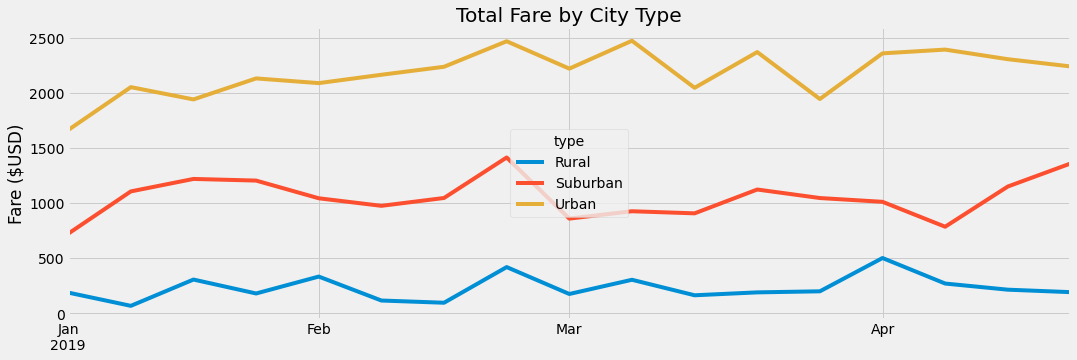

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import style from matplotlib

from matplotlib import style

# Use the graph style fivethirtyeight'

style.use('fivethirtyeight')
ax = weekly_fares_by_type_df.plot(figsize=(16,5))
ax.set_xlabel('')
ax.set_ylabel('Fare ($USD)')
ax.set_title('Total Fare by City Type')
ax.set_xlim('2019-01-01','2019-04-28')
plt.savefig('Analysis/Total_fare_by_City_Type')
plt.show()


